# Telecom X

### Extraccion

In [24]:
##Cargamos el archivo los datos json
import pandas as pd
import json


with open("TelecomX_Data.json", "r", encoding="utf-8") as f:
    data = json.load(f)


df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Transformacion

In [27]:
#Verificacion del dipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Consultar el diccionario para comprender mejor el significado de las variables.  
customerID: número de identificación único de cada cliente  
Churn: si el cliente dejó o no la empresa  
gender: género (masculino y femenino)  
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años  
Partner: si el cliente tiene o no una pareja  
Dependents: si el cliente tiene o no dependientes  
tenure: meses de contrato del cliente  
PhoneService: suscripción al servicio telefónico  
MultipleLines: suscripción a más de una línea telefónica  
InternetService: suscripción a un proveedor de internet  
OnlineSecurity: suscripción adicional de seguridad en línea  
OnlineBackup: suscripción adicional de respaldo en línea  
DeviceProtection: suscripción adicional de protección del dispositivo  
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera  
StreamingTV: suscripción de televisión por cable  
StreamingMovies: suscripción de streaming de películas  
Contract: tipo de contrato  
PaperlessBilling: si el cliente prefiere recibir la factura en línea  
PaymentMethod: forma de pago  
Charges.Monthly: total de todos los servicios del cliente por mes  
Charges.Total: total gastado por el cliente

### Identificar las columnas más relevantes para el análisis de evasión.  
Churn, tenure, Contract, Charges.Monthly, InternetService, SeniorCitizen, Partner, Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, PaymentMethod, Charges.Total.

In [28]:
def rename_columns(df):
    df.columns = [col.split('.')[-1] for col in df.columns]
    return df

In [29]:
df = rename_columns(df)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [33]:
## nuevo dataframe con las columnas mas relevantes para el analisis
dataframe = df[['Churn','SeniorCitizen','Partner', 'Dependents', 'tenure', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
          'Contract', 'PaymentMethod', 'Monthly', 'Total']].copy()

### Comprobación de incoherencias en los datos

In [34]:
#valores nulos
dataframe.isnull().sum()

Churn               0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

In [35]:
#Verificacion de inconsistencias
for col in dataframe.columns:
    print(col)
    print(sorted(dataframe[col].unique()))
    print("\n")

Churn
['', 'No', 'Yes']


SeniorCitizen
[0, 1]


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


tenure
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'No internet service', 'Yes']


OnlineBackup
['No', 'No internet service', 'Yes']


DeviceProtection
['No', 'No internet service', 'Yes']


TechSupport
['No', 'No internet service', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Monthly
[18.25, 18.4, 18.55, 18.7, 18.75, 18.8, 18.85, 18.9, 18.95, 19.0, 19.05, 19.1, 19.15, 19.2, 19.25, 19.3, 19.35, 19.4, 19.45, 19.5, 19.55, 19.6, 19.65, 19.7, 19.75, 19.8, 19.85, 

In [ ]:
dataframe = dataframe[dataframe["Churn"] != '']
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [37]:
dataframe = dataframe[dataframe["Total"] != ' ']
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [39]:
#verificacion de que no hay valores vacion en churn
dataframe['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [47]:
#verificacion de que no hay valores vacios en Total
print(sorted(dataframe['Total'].unique()))

[18.8, 18.85, 18.9, 19.0, 19.05, 19.1, 19.15, 19.2, 19.25, 19.3, 19.4, 19.45, 19.5, 19.55, 19.6, 19.65, 19.7, 19.75, 19.8, 19.85, 19.9, 19.95, 20.0, 20.05, 20.1, 20.15, 20.2, 20.25, 20.3, 20.35, 20.4, 20.45, 20.5, 20.55, 20.6, 20.65, 20.7, 20.75, 20.8, 20.85, 20.9, 20.95, 21.0, 21.05, 21.1, 23.45, 24.0, 24.05, 24.2, 24.25, 24.4, 24.45, 24.6, 24.7, 24.75, 24.8, 24.9, 25.0, 25.05, 25.1, 25.15, 25.2, 25.25, 25.3, 25.35, 25.4, 25.7, 25.75, 25.8, 25.85, 27.55, 28.3, 29.15, 29.7, 29.85, 29.9, 29.95, 30.2, 30.5, 30.55, 31.2, 31.35, 31.55, 31.9, 32.7, 33.2, 33.6, 33.7, 34.7, 34.75, 34.8, 35.0, 35.05, 35.1, 35.25, 35.45, 35.55, 35.75, 35.85, 35.9, 36.45, 36.55, 36.8, 37.2, 38.0, 38.15, 38.25, 38.45, 38.7, 38.8, 39.25, 39.3, 39.65, 39.8, 39.85, 40.1, 40.2, 40.25, 40.9, 41.2, 41.85, 42.45, 42.7, 42.9, 43.15, 43.3, 43.8, 43.85, 43.95, 44.0, 44.05, 44.1, 44.15, 44.2, 44.3, 44.35, 44.4, 44.45, 44.55, 44.6, 44.65, 44.7, 44.75, 44.8, 44.9, 44.95, 45.0, 45.05, 45.1, 45.15, 45.2, 45.25, 45.3, 45.35, 45.

In [ ]:
dataframe.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total                object
dtype: object

In [43]:
#debemos cambiar los object a category. Senior citizen a category y total a float
columns_category = ['Churn','SeniorCitizen','Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
          'Contract', 'PaymentMethod']
dataframe[columns_category] = dataframe[columns_category].astype("category")
dataframe['Total'] = dataframe['Total'].astype("float")

In [78]:
dataframe.dtypes

Churn               category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
Contract            category
PaymentMethod       category
Monthly              float64
Total                float64
Cuentas_Diarias      float64
dtype: object

Columna de cuentas diarias

In [51]:
dataframe['Cuentas_Diarias'] = (dataframe['Monthly']/30).round(3)

In [52]:
dataframe.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,No,0,Yes,Yes,9,DSL,No,Yes,No,Yes,One year,Mailed check,65.6,593.30,2.187
1,No,0,No,No,9,DSL,No,No,No,No,Month-to-month,Mailed check,59.9,542.40,1.997
2,Yes,0,No,No,4,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check,73.9,280.85,2.463
3,Yes,1,Yes,No,13,Fiber optic,No,Yes,Yes,No,Month-to-month,Electronic check,98.0,1237.85,3.267
4,Yes,1,Yes,No,3,Fiber optic,No,No,No,Yes,Month-to-month,Mailed check,83.9,267.40,2.797


## Carga y analisis

In [54]:
dataframe.describe()

,tenure,Monthly,Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159944
std,24.545260,30.085974,2266.771362,1.002870
min,1.000000,18.250000,18.800000,0.608000
25%,9.000000,35.587500,401.450000,1.186500
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995500
max,72.000000,118.750000,8684.800000,3.958000


distribucion de la evasion

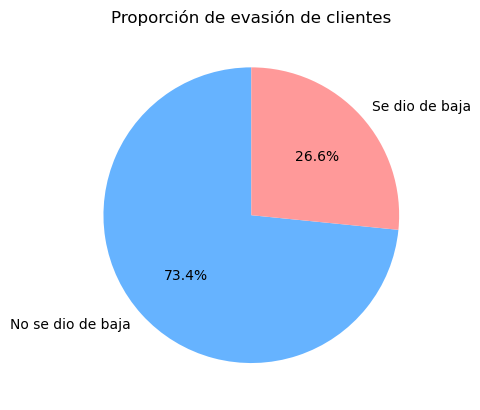

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

dataframe["Churn"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=["No se dio de baja", "Se dio de baja"],
    colors=["#66b3ff", "#ff9999"],
    ylabel=""
)
plt.title("Proporción de evasión de clientes")
plt.show()



Recuento de evasion por variables categoricas

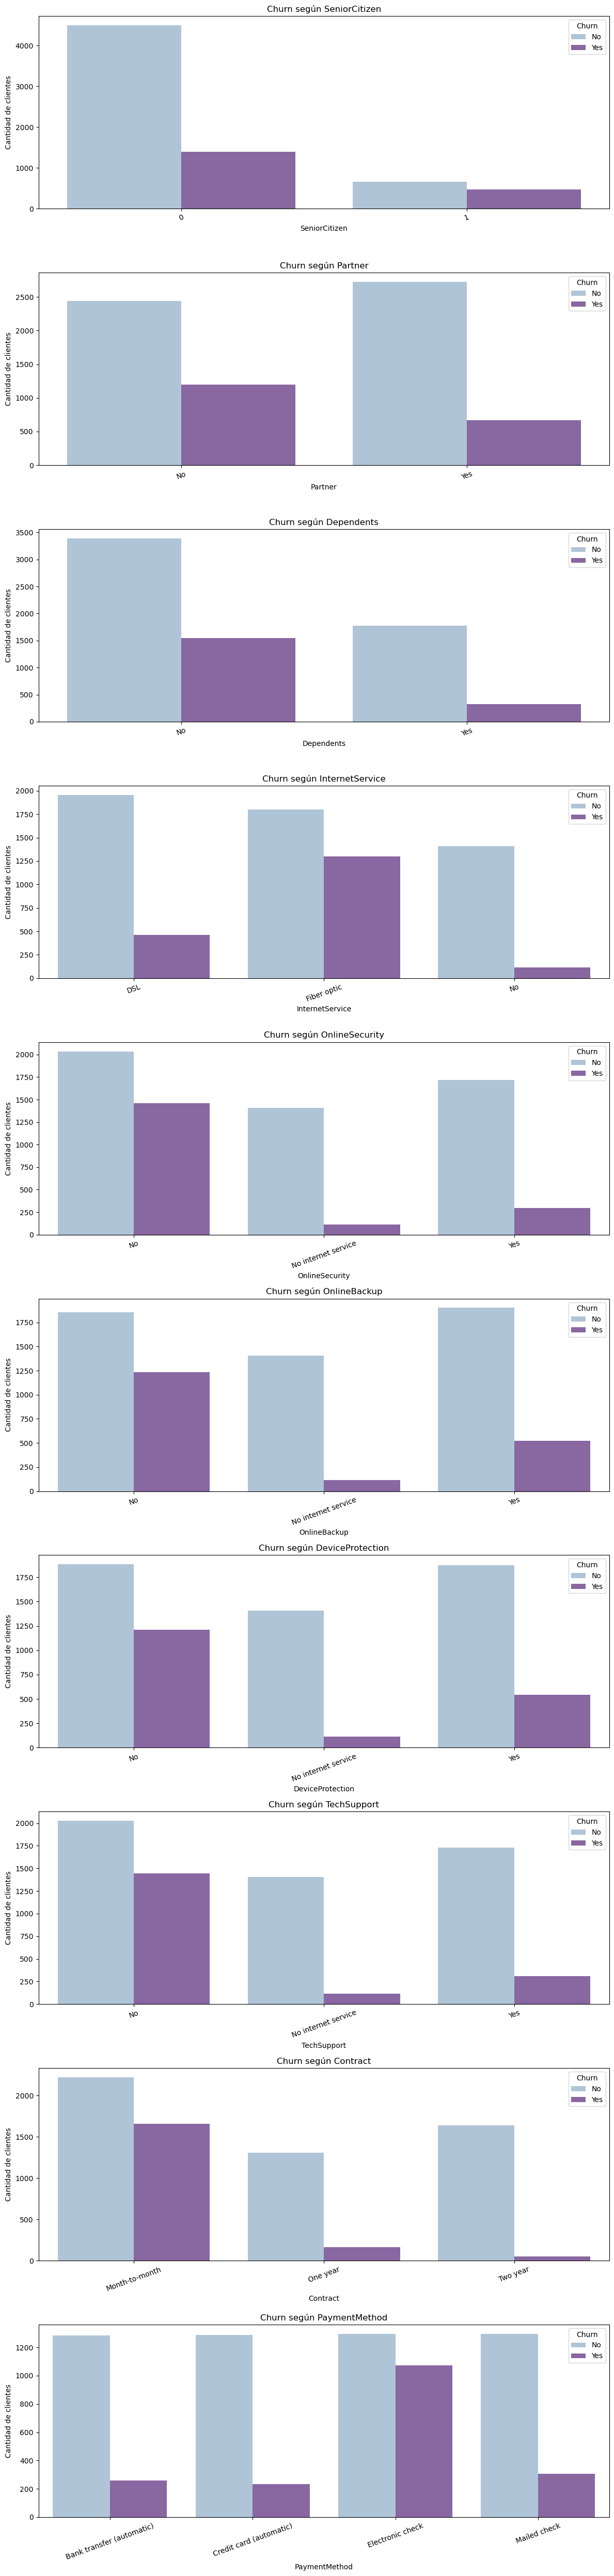

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = dataframe.select_dtypes(include="category").columns.drop("Churn")


fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(12, 5*len(cat_cols)))

for i, col in enumerate(cat_cols):
    sns.countplot(data=dataframe, x=col, hue="Churn", ax=axes[i], palette='BuPu')
    axes[i].set_title(f"Churn según {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Cantidad de clientes")
    axes[i].legend(title="Churn")
    axes[i].tick_params(axis="x", rotation=20)  

plt.tight_layout()
plt.show()



Recuento de evasion por variables numericas

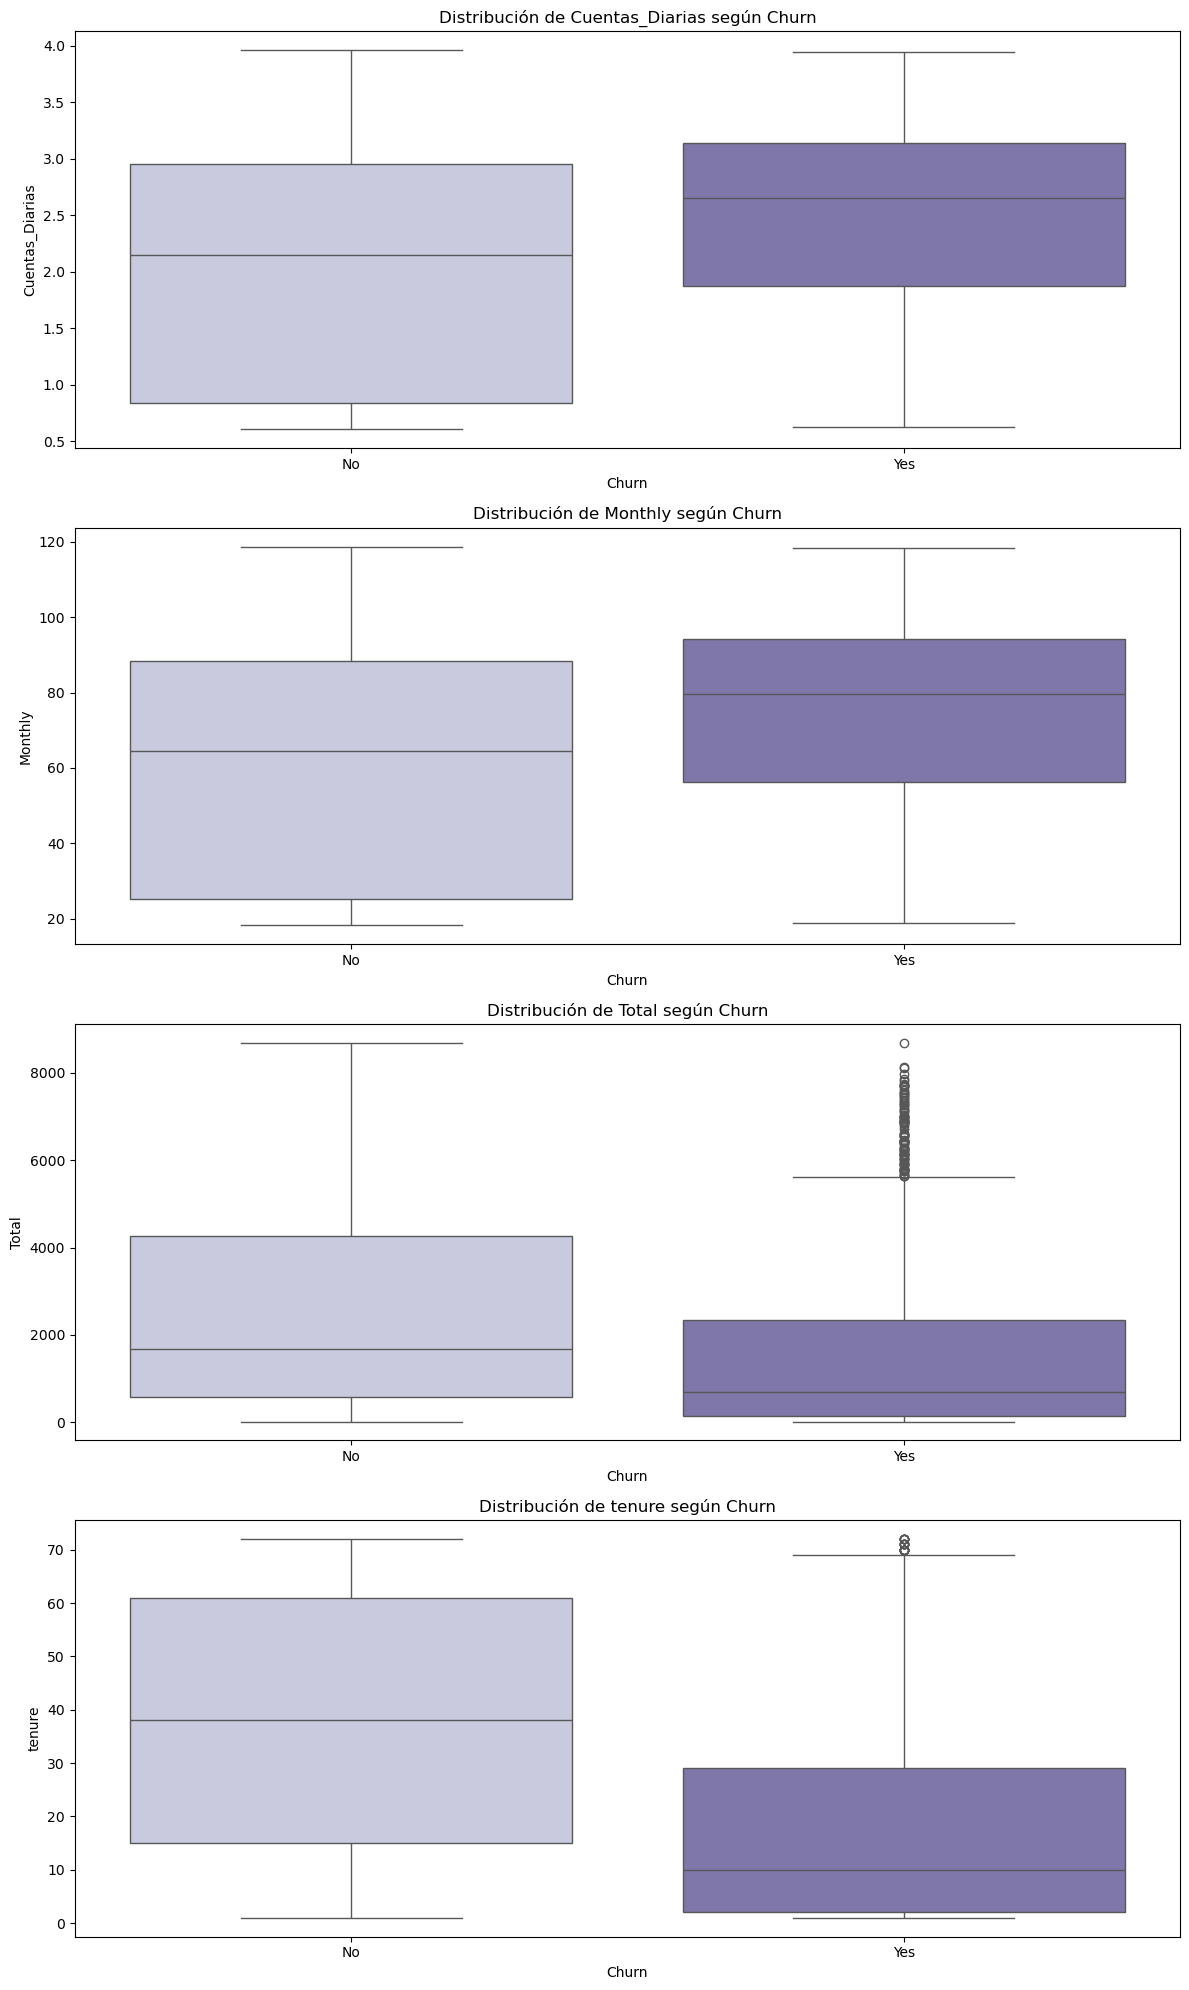

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
num_cols = dataframe.select_dtypes(include=["int64","float"]).columns

# Excluir 'Churn' si está codificada como numérica
num_cols = num_cols.difference(["Churn"])

# Crear un boxplot para cada variable numérica vs Churn
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12, 5*len(num_cols)))

if len(num_cols) == 1:
    axes = [axes]  # para que funcione aunque haya solo 1 variable

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=dataframe, x="Churn",hue="Churn", legend=False, y=col, ax=ax, palette="Purples")
    ax.set_title(f"Distribución de {col} según Churn")
    ax.set_xlabel("Churn")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


# Informe final

## 1. Introduccion.  
Se busca visualizar los factores que influyen en la evasion de clientes. Identificar patrones de comportamientos para diseñar estrategias de reduccion de perdida de clientes.  

## 2. Limpieza y tratamiento de los datos.  
Se importaron los datos del formato json y se transformo a un dataframe. Luego, se extrajeron las columnas mas relevantes para el analisis. Se corrigio:  
    - Eliminacion de valores faltantes de churn  
    - Eliminacion de valores faltantes de Total.  
    - Conversion de las variables object a categoricas.  
    - Conversion de valor object a float.  

## 3. Analisis exploratorio de datos.  
Mas arriba se pueden visualizar los graficos realizados para el estudio del problema de evasion de clientes. 
    - Grafico de torta para la Proporción de evasión de clientes donde se visualiza que el 26,6% de los clientes se dio de baja.  
    - Churn segun Senior Citizen: al visualizar con respecto a la franja etaria podemos concluir que los mayores a 65 años son los que mas se dan de baja.  
    - Churn segun partner: se observa que las personas que no tienen pareja son las que mas tienden a dejar el servicio.  
    - Churn segun dependents: se observa que los que son independientes son los que mas tienden a dejar el servicio.  
    - Churn segun InternetService: se observa que los clientes con fibra optica son los que mas tienden a dejar el servicio.  
    - Churn segun InternetSecurity: se observa que los clientes que no tienen proteccion de internet son los que mas tienden a dejar el servicio.  
    - Churn segun DeviceProtection: se observa que los clientes que no tienen proteccion de dispositivos son los que mas tienden a dejar el servicio.  
    - Churn segun TechSupport: se observa que los clientes que no tienen soporte tecnico son los que mas tienden a dejar el servicio.  
    - Churn segun contract: se observa que a menor tiempo de contrato mayor es la tendencia a dejar el servicio.  
    - Churn segun paymethod: se observa que los que realizar pago electronico son los que mas tienden a dejar el servicio.  
    - Distribucion de cuentas diarias: los clientes con mayor facturacion diaria tienen mayor propension cancelar el servicio, lo cual indica que el precio puede estar influyendo en su decision.  
    - Distribucion de mounthly segun churn: los clientes con mayor cantidad de servicios tienden a la evasion, con lo cual se refuerza que el precio es un factor clave en la evasion.  
    - Distribucion de total segun churn: los clientes que pagan menos tienden a la evasion pero se visualizan varios outliers con monton muchos mayores.  
    - Distribucion de tenure segun churn: a menor meses de contrato mayor evasion.  

## Conclusiones e insights:  
Cuando mas meses tienen los clientes de contrato presentan un menor porcentaje de evasion. Aquellos que pagan con electronic check son los que mas evaden. El servicio de fibra optica es el que mas usuarios estan teniendo evasion lo cual indica que la fibra optica deberia de mejorar.  

## Recomendaciones:  
Mejorar el servicio de fibra optica, implementar descuentos o beneficios a clientes con contrato mensual, identificar a los clientes con cuotas elevadas y con mayor cantidad de servicios para ofrecerles combos  y planes personalizados, promocion para adultos mayores de 65 años.  